In [1]:
import pandas as pd

df = pd.read_json("../../datas/zap/detected.json", lines=True)

df.head(5)

,method,path,headers,uuid,peer,status,cookies,response_msg,timestamp,post_data
0,GET,/,"{'host': '127.0.0.1', 'user-agent': 'curl/7.81...",abbc944d-6737-46da-a56a-7300397feb8f,"{'ip': '172.18.0.1', 'port': 60626}",200,{'sess_uuid': None},"{'version': '0.6.0', 'response': {'message': {...",2025-06-14 09:41:17.463548,NaN
1,GET,/,"{'host': '127.0.0.1', 'user-agent': 'Mozilla/5...",abbc944d-6737-46da-a56a-7300397feb8f,"{'ip': '172.18.0.1', 'port': 50540}",200,{'sess_uuid': None},"{'version': '0.6.0', 'response': {'message': {...",2025-06-14 09:42:02.438251,NaN
2,GET,/,"{'host': '127.0.0.1', 'user-agent': 'Mozilla/5...",abbc944d-6737-46da-a56a-7300397feb8f,"{'ip': '172.18.0.1', 'port': 50540}",200,{'sess_uuid': None},"{'version': '0.6.0', 'response': {'message': {...",2025-06-14 09:42:02.499190,NaN
3,GET,/robots.txt,"{'host': '127.0.0.1', 'user-agent': 'Mozilla/5...",abbc944d-6737-46da-a56a-7300397feb8f,"{'ip': '172.18.0.1', 'port': 50542}",200,{'sess_uuid': None},"{'version': '0.6.0', 'response': {'message': {...",2025-06-14 09:42:02.496824,NaN
4,GET,/,"{'host': '127.0.0.1', 'user-agent': 'Mozilla/5...",abbc944d-6737-46da-a56a-7300397feb8f,"{'ip': '172.18.0.1', 'port': 50546}",200,{'sess_uuid': None},"{'version': '0.6.0', 'response': {'message': {...",2025-06-14 09:42:02.501211,NaN


In [2]:
user_agents_matrix = []
tmp = []
sess_uuids_user_agents = {
  # "{sess_uuid}": []
}
sess_uuids = []

for _, row in df.iterrows():
  sess_uuid = row.get("cookies", {}).get("sess_uuid") or row.get("response_msg", {}).get("response", {}).get("message", {}).get("sess_uuid")
  user_agent = row.get("headers", {}).get("user-agent", "")

  if user_agent == None:
    continue

  if sess_uuid in sess_uuids:
    sess_uuids_user_agents[sess_uuid].append(user_agent)
  else:
    sess_uuids_user_agents[sess_uuid] = [user_agent]
    sess_uuids.append(sess_uuid)

user_agents_matrix = list(sess_uuids_user_agents.values())

for i, sess_uuid_user_agent in enumerate(sess_uuids_user_agents):
  if i == 9:
    break
  print(sess_uuid_user_agent)

c58bf9d6-7a8a-4b9c-8dcd-81406de2bbd6
cf902971-14ec-45f8-9839-6fb5e589eb71
c4a766ff-d542-4ac3-b022-f17e56ace45d
ced23b77-6361-4644-a7fd-e43beac2c02f
a31a1846-725c-47da-b31d-dd7870ef7d35
7af65789-ebba-42c3-aea9-2cb6eef7691b
d66b2543-eb02-4ae6-b0ed-f2735fb127d8
b2509bfd-bba5-4e2e-92a8-ba4ee028f875
84a53119-f36c-483e-816d-e5c1c93ed7e1


In [3]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(user_agents_matrix).transform(user_agents_matrix)
df = pd.DataFrame(te_ary, columns=te.columns_)

df.head(10)

,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1),Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.0),Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1),Mozilla/5.0 (Windows NT 10.0; Trident/7.0; rv:11.0) like Gecko,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3739.0 Safari/537.36 Edg/75.0.109.0","Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:93.0) Gecko/20100101 Firefox/91.0,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),Mozilla/5.0 (compatible; Yahoo! Slurp; http://help.yahoo.com/help/us/ysearch/slurp),"Mozilla/5.0 (iPhone; CPU iPhone OS 8_0_2 like Mac OS X) AppleWebKit/600.1.4 (KHTML, like Gecko) Version/8.0 Mobile/12A366 Safari/600.1.4","Mozilla/5.0 (iPhone; U; CPU iPhone OS 3_0 like Mac OS X; en-us) AppleWebKit/528.18 (KHTML, like Gecko) Version/4.0 Mobile/7A341 Safari/528.16",curl/7.81.0,msnbot/1.1 (+http://search.msn.com/msnbot.htm)
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,True,True,True,True,True,True,True,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True,False,True
4,True,True,True,True,True,True,True,True,True,True,True,True,False,True
5,True,True,True,True,True,True,True,True,True,True,True,True,False,True
6,True,True,True,True,True,True,True,True,True,True,True,True,False,True
7,True,True,True,True,True,True,True,True,True,True,True,True,False,True
8,True,True,True,True,True,True,True,True,True,True,True,True,False,True
9,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [4]:
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
import time
from memory_profiler import memory_usage

start = time.time()
freq_apriori = apriori(df, min_support=0.2, use_colnames=True)
time_apriori = time.time() - start
mem_apriori = memory_usage((apriori, (df,), {'min_support': 0.2, 'use_colnames': True}))

freq_apriori["length"] = freq_apriori["itemsets"].apply(lambda x: len(x))

print("Apriori time:", time_apriori)
print(f"Memory used: {max(mem_apriori) - min(mem_apriori):.8f} MB")

Apriori time: 0.07365536689758301
Memory used: 5.58593750 MB


In [5]:
start = time.time()
freq_fpgrowth = fpgrowth(df, min_support=0.2, use_colnames=True)
time_fpgrowth = time.time() - start
mem_fpgrowth = memory_usage((fpgrowth, (df,), {'min_support': 0.2, 'use_colnames': True}))

freq_fpgrowth["length"] = freq_fpgrowth["itemsets"].apply(lambda x: len(x))

print("FPGrowth time:", time_fpgrowth)
print(f"Memory used: {max(mem_fpgrowth) - min(mem_fpgrowth):.8f} MB")

FPGrowth time: 0.638422966003418
Memory used: 5.39062500 MB


In [6]:
start = time.time()
freq_fpmax = fpmax(df, min_support=0.2, use_colnames=True)
time_fpmax = time.time() - start
mem_fpmax = memory_usage((fpgrowth, (df,), {'min_support': 0.2, 'use_colnames': True}))

freq_fpmax["length"] = freq_fpmax["itemsets"].apply(lambda x: len(x))

print("FPMax time:", time_fpmax)
print(f"Memory used: {max(mem_fpmax) - min(mem_fpmax):.8f} MB")

FPMax time: 0.0028264522552490234
Memory used: 4.79296875 MB


In [7]:
print("Jumlah pattern Apriori:", len(freq_apriori))
print("Jumlah pattern FP-Growth:", len(freq_fpgrowth))
print("Jumlah pattern FPMax:", len(freq_fpmax))

Jumlah pattern Apriori: 8191
Jumlah pattern FP-Growth: 8191
Jumlah pattern FPMax: 1


In [8]:
print("Panjang rata-rata itemset Apriori:", freq_apriori['length'].mean())
print("Panjang rata-rata itemset Apriori:", freq_fpgrowth['length'].mean())
print("Panjang rata-rata itemset Apriori:", freq_fpmax['length'].mean())

Panjang rata-rata itemset Apriori: 6.500793553900623
Panjang rata-rata itemset Apriori: 6.500793553900623
Panjang rata-rata itemset Apriori: 13.0


In [9]:
common = set(freq_apriori['itemsets']) & set(freq_fpgrowth['itemsets'])
print("Jumlah itemset yang sama (Apriori vs FPGrowth):", len(common))

Jumlah itemset yang sama (Apriori vs FPGrowth): 8191


In [10]:
common = set(freq_apriori['itemsets']) & set(freq_fpmax['itemsets'])
print("Jumlah itemset yang sama (Apriori vs FPMax):", len(common))

Jumlah itemset yang sama (Apriori vs FPMax): 1


In [11]:
common = set(freq_fpgrowth['itemsets']) & set(freq_fpmax['itemsets'])
print("Jumlah itemset yang sama (Apriori vs FPMax):", len(common))

Jumlah itemset yang sama (Apriori vs FPMax): 1


In [12]:
from mlxtend.frequent_patterns import association_rules
rules_apriori = association_rules(freq_apriori, metric="lift", min_threshold=1.0)
rules_fpgrowth = association_rules(freq_fpgrowth, metric="lift", min_threshold=1.0)
rules_fpmax = association_rules(freq_fpmax, metric="lift", min_threshold=1.0, support_only=True)
# print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

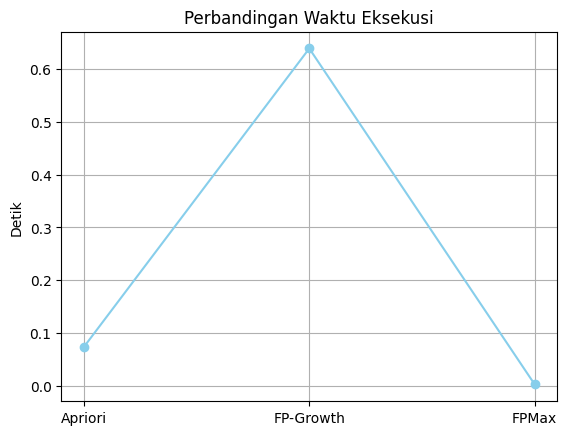

In [13]:
import matplotlib.pyplot as plt

algorithms = ['Apriori', 'FP-Growth', 'FPMax']
execution_times = [time_apriori, time_fpgrowth, time_fpmax]  # waktu dalam detik

plt.plot(algorithms, execution_times, marker="o", color='skyblue')
plt.title('Perbandingan Waktu Eksekusi')
plt.ylabel('Detik')
plt.grid(True)
plt.show()

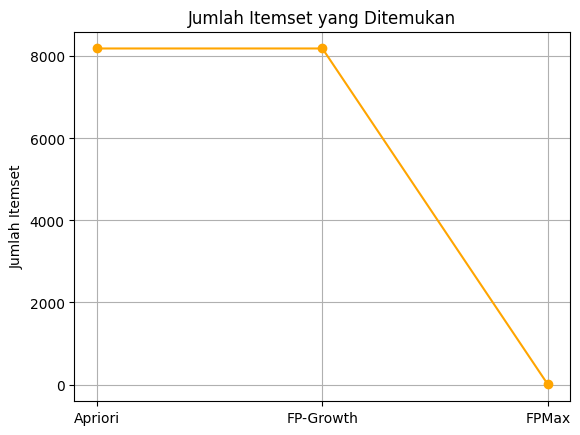

In [14]:
itemset_counts = [len(freq_apriori), len(freq_fpgrowth), len(freq_fpmax)]

plt.plot(algorithms, itemset_counts, marker="o", color='orange')
plt.title('Jumlah Itemset yang Ditemukan')
plt.ylabel('Jumlah Itemset')
plt.grid(True)
plt.show()


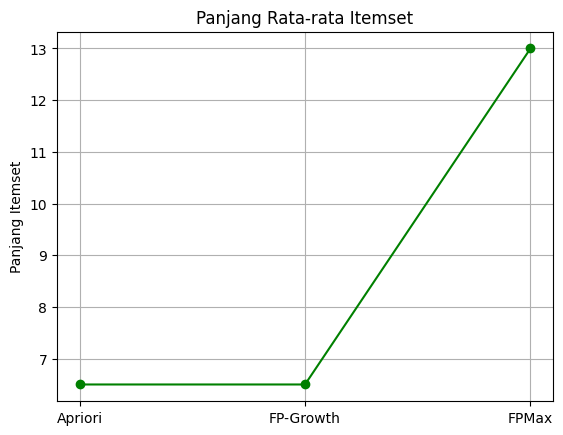

In [15]:
avg_lengths = [freq_apriori["length"].mean(), freq_fpgrowth["length"].mean(), freq_fpmax["length"].mean()]

plt.plot(algorithms, avg_lengths, marker='o', color='green')
plt.title('Panjang Rata-rata Itemset')
plt.ylabel('Panjang Itemset')
plt.grid(True)
plt.show()

C:\Users\KAKA\AppData\Local\Temp\ipykernel_5004\3291859140.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_rules = pd.concat([rules_apriori, rules_fpgrowth, rules_fpmax])


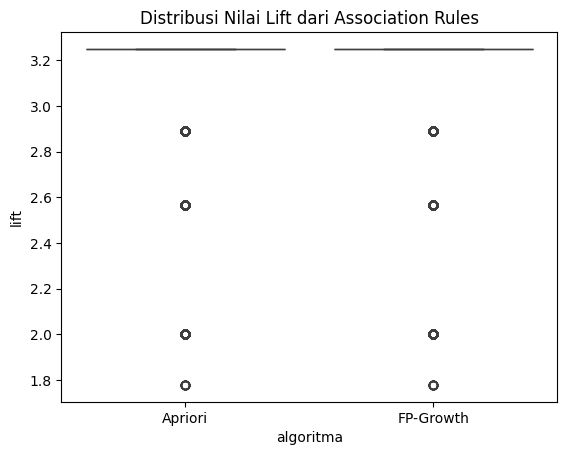

In [16]:
import seaborn as sns

# Misal sudah punya 3 DataFrame: rules_apriori, rules_fpgrowth, rules_fpmax
rules_apriori['algoritma'] = 'Apriori'
rules_fpgrowth['algoritma'] = 'FP-Growth'
rules_fpmax['algoritma'] = 'FPMax'

import pandas as pd
all_rules = pd.concat([rules_apriori, rules_fpgrowth, rules_fpmax])

sns.boxplot(data=all_rules, x='algoritma', y='lift')
plt.title('Distribusi Nilai Lift dari Association Rules')
plt.show()
